
# Clasificación de hongos

En este proyecto, determinaremos si un hongo es comestible o venenoso según su especificación.







In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from google.colab import files
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from PIL import Image
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset Mushroom

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Machine Learning/examen final/mushrooms.csv')

In [ ]:
data_c=data.copy()

# Examinar la base de datos

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#Valores Nulos

In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#Se tienen dos clasificaciones , el hongo es venenoso o comestible

In [ ]:
data['class'].unique()

array(['p', 'e'], dtype=object)

# atributo class

In [ ]:
count = data['class'].value_counts()

In [ ]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
data.shape

(8124, 23)

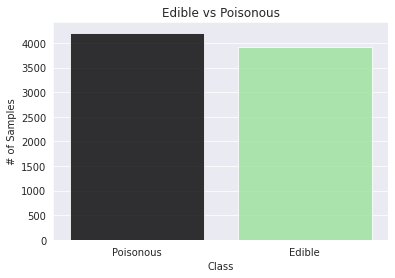

In [ ]:
#target variable countplot
#mostly balanced target
sns.set_style('darkgrid')
plt.figure()
fig1=sns.countplot(data['class'], alpha =.80, palette= ['black','lightgreen'])
plt.title('Edible vs Poisonous')
plt.ylabel('# of Samples')
plt.xlabel('Class')
fig1.set(xticklabels=['Poisonous','Edible'])
plt.show()

# Manipulación de datos

Todos los datos son de "tipo de objeto". Entonces, necesitamos convertirlo en tipo numérico.

In [ ]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Utilice **LabelEncoder()** para codificar los datos del objeto en enteros.

In [ ]:
label_encoder = LabelEncoder()
for col in data.columns:
  data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


distribucion de los datos

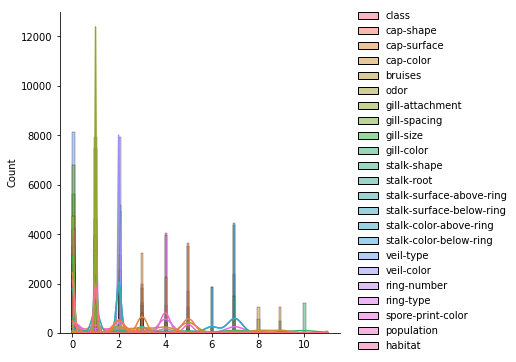

In [ ]:
sns.displot(data,kde=True)

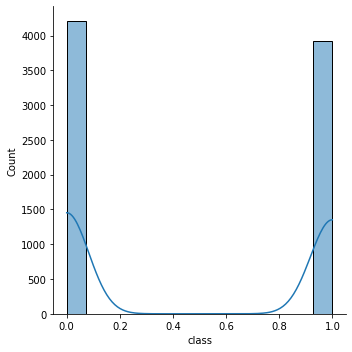

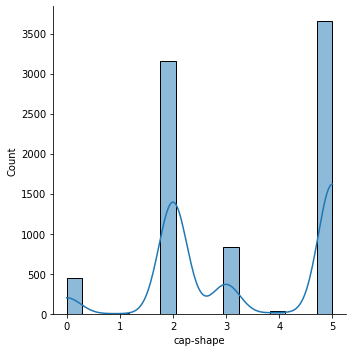

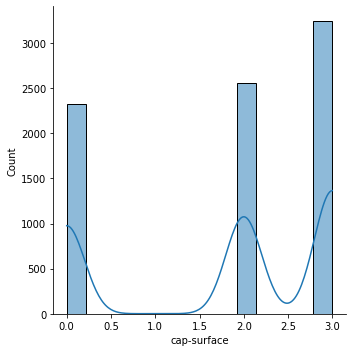

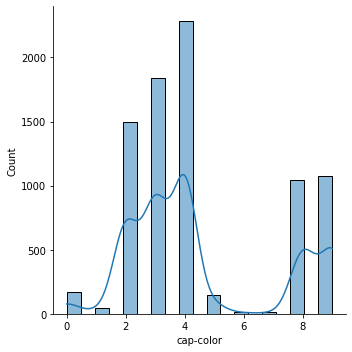

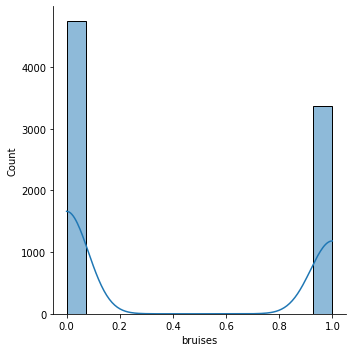

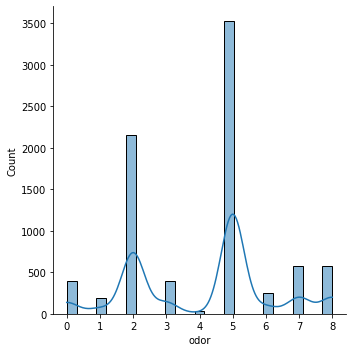

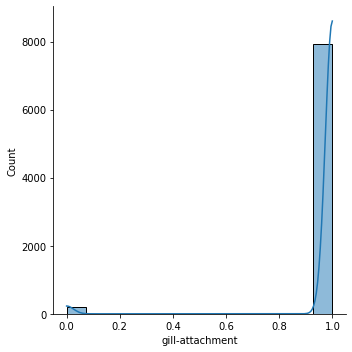

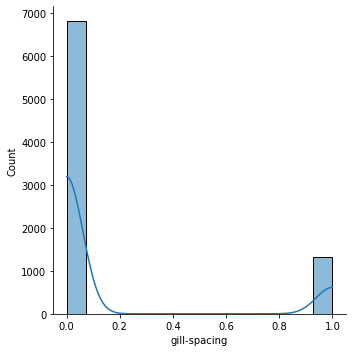

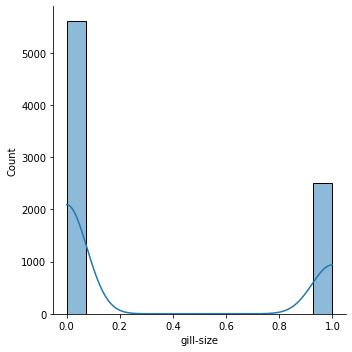

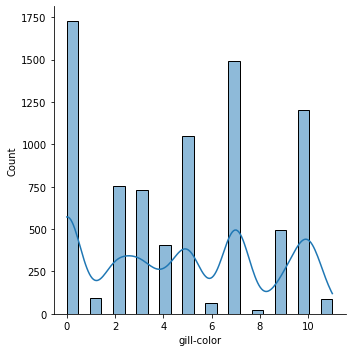

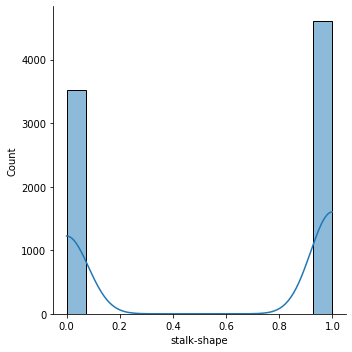

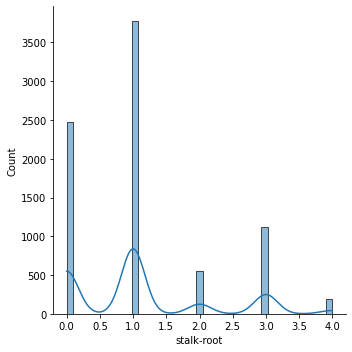

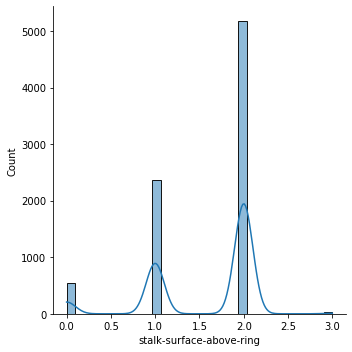

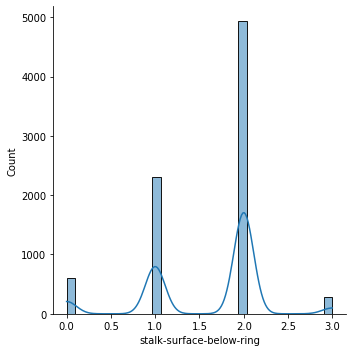

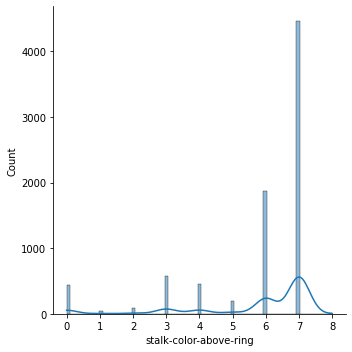

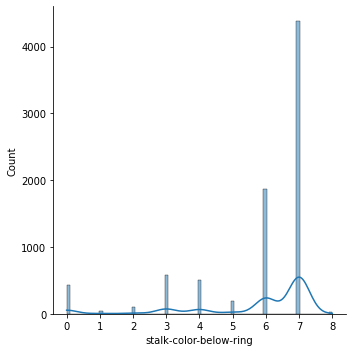

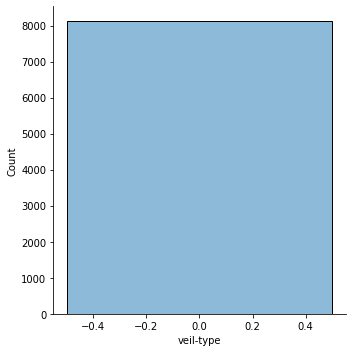

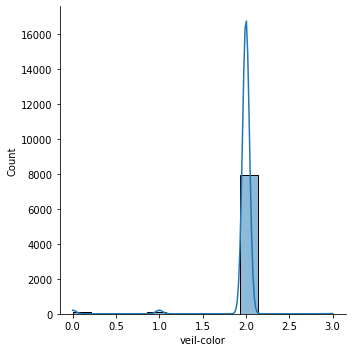

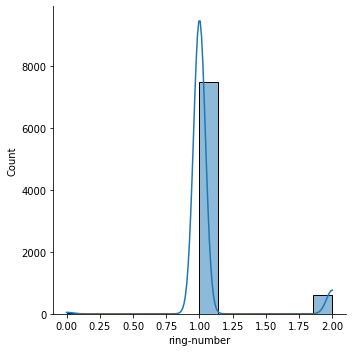

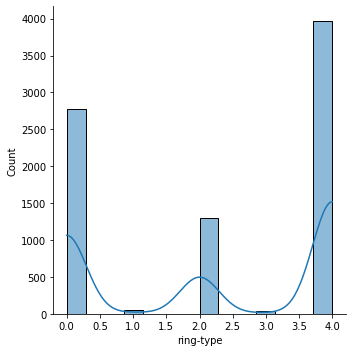

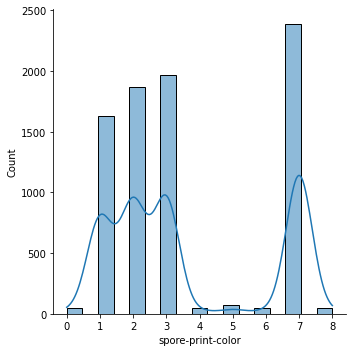

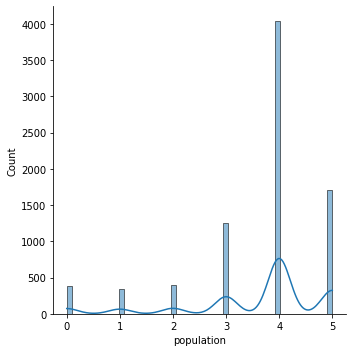

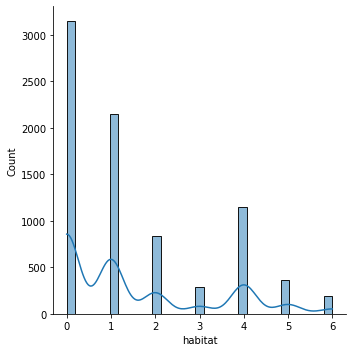

In [ ]:
columns_data=list(data.columns)
for i in range (len(columns_data)):
  column=columns_data[i]
  sns.displot(data[column],kde=True)
  #plt.savefig('img'+str(i)+'.png', format='png', dpi=900)
  #files.download('img'+str(i)+'.png') 

In [ ]:
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


#Normalizacion de los datos
##Min - max normalization

In [ ]:
maxDatos = []
minDatos = []
rangoDatos = []
maxNorm = 1
minNorm = 0
rangoNorm = maxNorm - minNorm

for i in range (0,data.columns.size):  
    maxDatos.append(data.iloc[:,i].max())
    minDatos.append(data.iloc[:,i].min())
    rangoDatos.append(maxDatos[i] - minDatos[i])

In [ ]:
nombres =  data.columns.values.tolist()
datosNorm = pd.DataFrame(columns=nombres)
for j in range (len(data.columns)):
    varNorm = []
    #Se selecciona uno de los atributos
    var = data.iloc[:,j] 
    for i in range (len(data)):
       # Se obtiene el valor normalizado 
        D = var[i] - minDatos[j] 
        Dpet = D/rangoDatos[j]
        dNorm = rangoNorm*Dpet
        varNorm.append(minNorm+dNorm)
    datosNorm.iloc[:,j] = varNorm

In [ ]:
data =  datosNorm
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.875,0.875,NaN,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.875,0.875,NaN,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.875,0.875,NaN,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.875,0.875,NaN,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.875,0.875,NaN,0.666667,0.5,0.0,0.375,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,NaN,0.333333,0.5,1.0,0.000,0.2,0.333333
8120,0.0,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,NaN,0.000000,0.5,1.0,0.000,0.8,0.333333
8121,0.0,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545,...,0.666667,0.625,0.625,NaN,0.333333,0.5,1.0,0.000,0.2,0.333333
8122,1.0,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,...,0.333333,0.875,0.875,NaN,0.666667,0.5,0.0,0.875,0.8,0.333333


#Analisis de componentes principales

##covarianza y matriz de covarianza

In [ ]:
def covarianza(X,Y):
  x_mean=X.mean()
  y_mean=Y.mean()
  n=len(X)
  cov=(((X-x_mean)*(Y-y_mean)).sum())/(n-1)
  return cov

In [ ]:
def matriz_cov(data):
  atributos=data.columns
  n=len(atributos)
  m=np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      X=data[atributos[i]]
      Y=data[atributos[j]]
      m[i][j]=covarianza(X,Y)
  return m


##Encontrar la matriz de covarianza y sus respectivos eigenvectores y eigenvalores

In [ ]:
#Eliminando el atributo de decisión 
datos1 = data.drop(['class'],axis=1)
#Ajustar los datos restando la media a cada atributo
datosAjustados = pd.DataFrame(columns=datos1.columns,index=range(len(datos1)))
for i in datosAjustados.columns:
    datosAjustados[i] = datos1[i] - datos1[i].mean()    
datosAjustados

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.330379,0.057443,-0.056075,0.584441,0.231905,0.025849,-0.161497,0.690793,-0.073699,-0.567208,...,0.132119,0.147957,0.150665,NaN,0.011489,-0.034712,0.427006,-0.199594,-0.128804,0.581897
1,0.330379,0.057443,0.499480,0.584441,-0.518095,0.025849,-0.161497,-0.309207,-0.073699,-0.567208,...,0.132119,0.147957,0.150665,NaN,0.011489,-0.034712,0.427006,-0.074594,-0.328804,-0.084769
2,-0.669621,0.057443,0.388369,0.584441,-0.143095,0.025849,-0.161497,-0.309207,0.017211,-0.567208,...,0.132119,0.147957,0.150665,NaN,0.011489,-0.034712,0.427006,-0.074594,-0.328804,0.248564
3,0.330379,0.390776,0.388369,0.584441,0.231905,0.025849,-0.161497,0.690793,0.017211,-0.567208,...,0.132119,0.147957,0.150665,NaN,0.011489,-0.034712,0.427006,-0.199594,-0.128804,0.581897
4,0.330379,0.057443,-0.167186,-0.415559,0.106905,0.025849,0.838503,-0.309207,-0.073699,0.432792,...,0.132119,0.147957,0.150665,NaN,0.011489,-0.034712,-0.572994,-0.074594,-0.728804,-0.084769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.069621,0.057443,-0.056075,-0.415559,0.106905,-0.974151,-0.161497,-0.309207,0.562665,-0.567208,...,0.132119,-0.102043,-0.099335,NaN,-0.321845,-0.034712,0.427006,-0.449594,-0.528804,0.081897
8120,0.330379,0.057443,-0.056075,-0.415559,0.106905,-0.974151,-0.161497,-0.309207,0.562665,-0.567208,...,0.132119,-0.102043,-0.099335,NaN,-0.655178,-0.034712,0.427006,-0.449594,0.071196,0.081897
8121,-0.269621,0.057443,-0.056075,-0.415559,0.106905,-0.974151,-0.161497,-0.309207,0.017211,-0.567208,...,0.132119,-0.102043,-0.099335,NaN,-0.321845,-0.034712,0.427006,-0.449594,-0.528804,0.081897
8122,-0.069621,0.390776,-0.056075,-0.415559,0.481905,0.025849,-0.161497,0.690793,-0.437335,0.432792,...,-0.201215,0.147957,0.150665,NaN,0.011489,-0.034712,-0.572994,0.425406,0.071196,0.081897


In [ ]:
m = matriz_cov(datosAjustados)

In [ ]:
L,V =  np.linalg.eig(m)

In [ ]:
#Eigenvalores
L

array([0.58908171, 0.33220831, 0.26307807, 0.16909633, 0.13569672,
       0.10981818, 0.08932529, 0.08806935, 0.05238887, 0.00092305,
       0.00335926, 0.01028857, 0.01181875, 0.04582876, 0.04216946,
       0.0378067 , 0.03510852, 0.02399418, 0.02716171, 0.02938355,
       0.02860455, 0.        ])

In [ ]:
#Obtener el porcentaje de covarianza de cada uno de los atributos
total = L.sum()
p = (L/total)*100
p

array([27.71875459, 15.6317885 , 12.37892171,  7.95668849,  6.38509737,
        5.1674039 ,  4.20312793,  4.14403054,  2.46511498,  0.04343346,
        0.1580674 ,  0.48412006,  0.55612147,  2.15643443,  1.98424912,
        1.77896319,  1.65200248,  1.12902638,  1.27807168,  1.3826186 ,
        1.34596372,  0.        ])

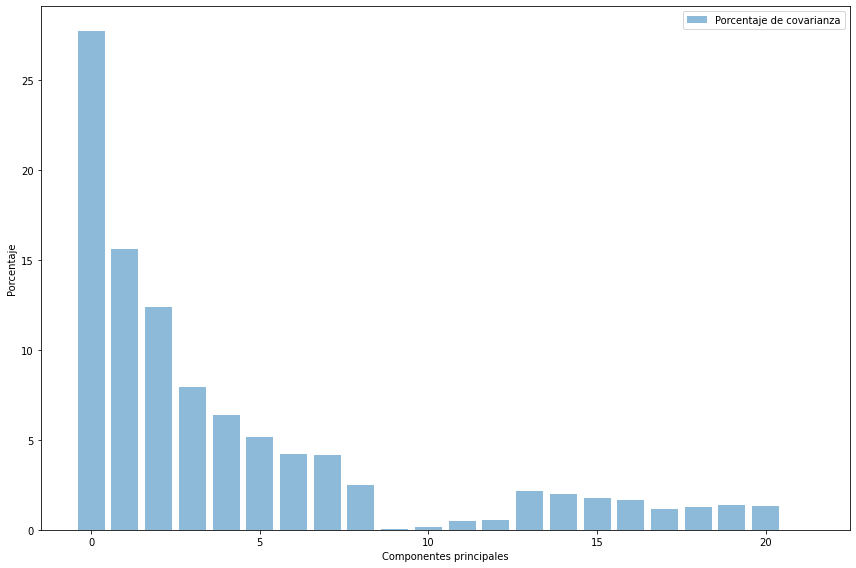

In [ ]:
    plt.figure(figsize=(12, 8))
    
    plt.bar(range(22), p, alpha=0.5, align='center',
            label='Porcentaje de covarianza')
    plt.ylabel('Porcentaje')
    plt.xlabel('Componentes principales')
    plt.legend(loc='best')
    plt.tight_layout()

Se puede observar que los últimos 12 componentes tienen menos cantidad de variación de los datos. Los primeros 9 componentes retienen más del 86% de los datos.

Realización de PCA tomando 17 componentes con varianza máxima

In [ ]:
data_pca=data[data.columns[[0,1,2,3,4,5,6,7,8,9]]]
class_names = list(data_c["class"])
data_pca

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636
...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000
8120,0.0,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000
8121,0.0,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545
8122,1.0,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000


# Dividir los datos en conjuntos de datos de entrenamiento y prueba

In [ ]:
X = data_pca.drop(['class'] , axis = 1)
Y = data_pca['class']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
print("X_test shape:",X_test.shape) 
print("X_train shape:",X_train.shape)

X_test shape: (1625, 9)
X_train shape: (6499, 9)


In [ ]:
print("Y_test shape:",Y_test.shape)
print("Y_train shape:",Y_train.shape)

Y_test shape: (1625,)
Y_train shape: (6499,)


#Arbol de desiciones

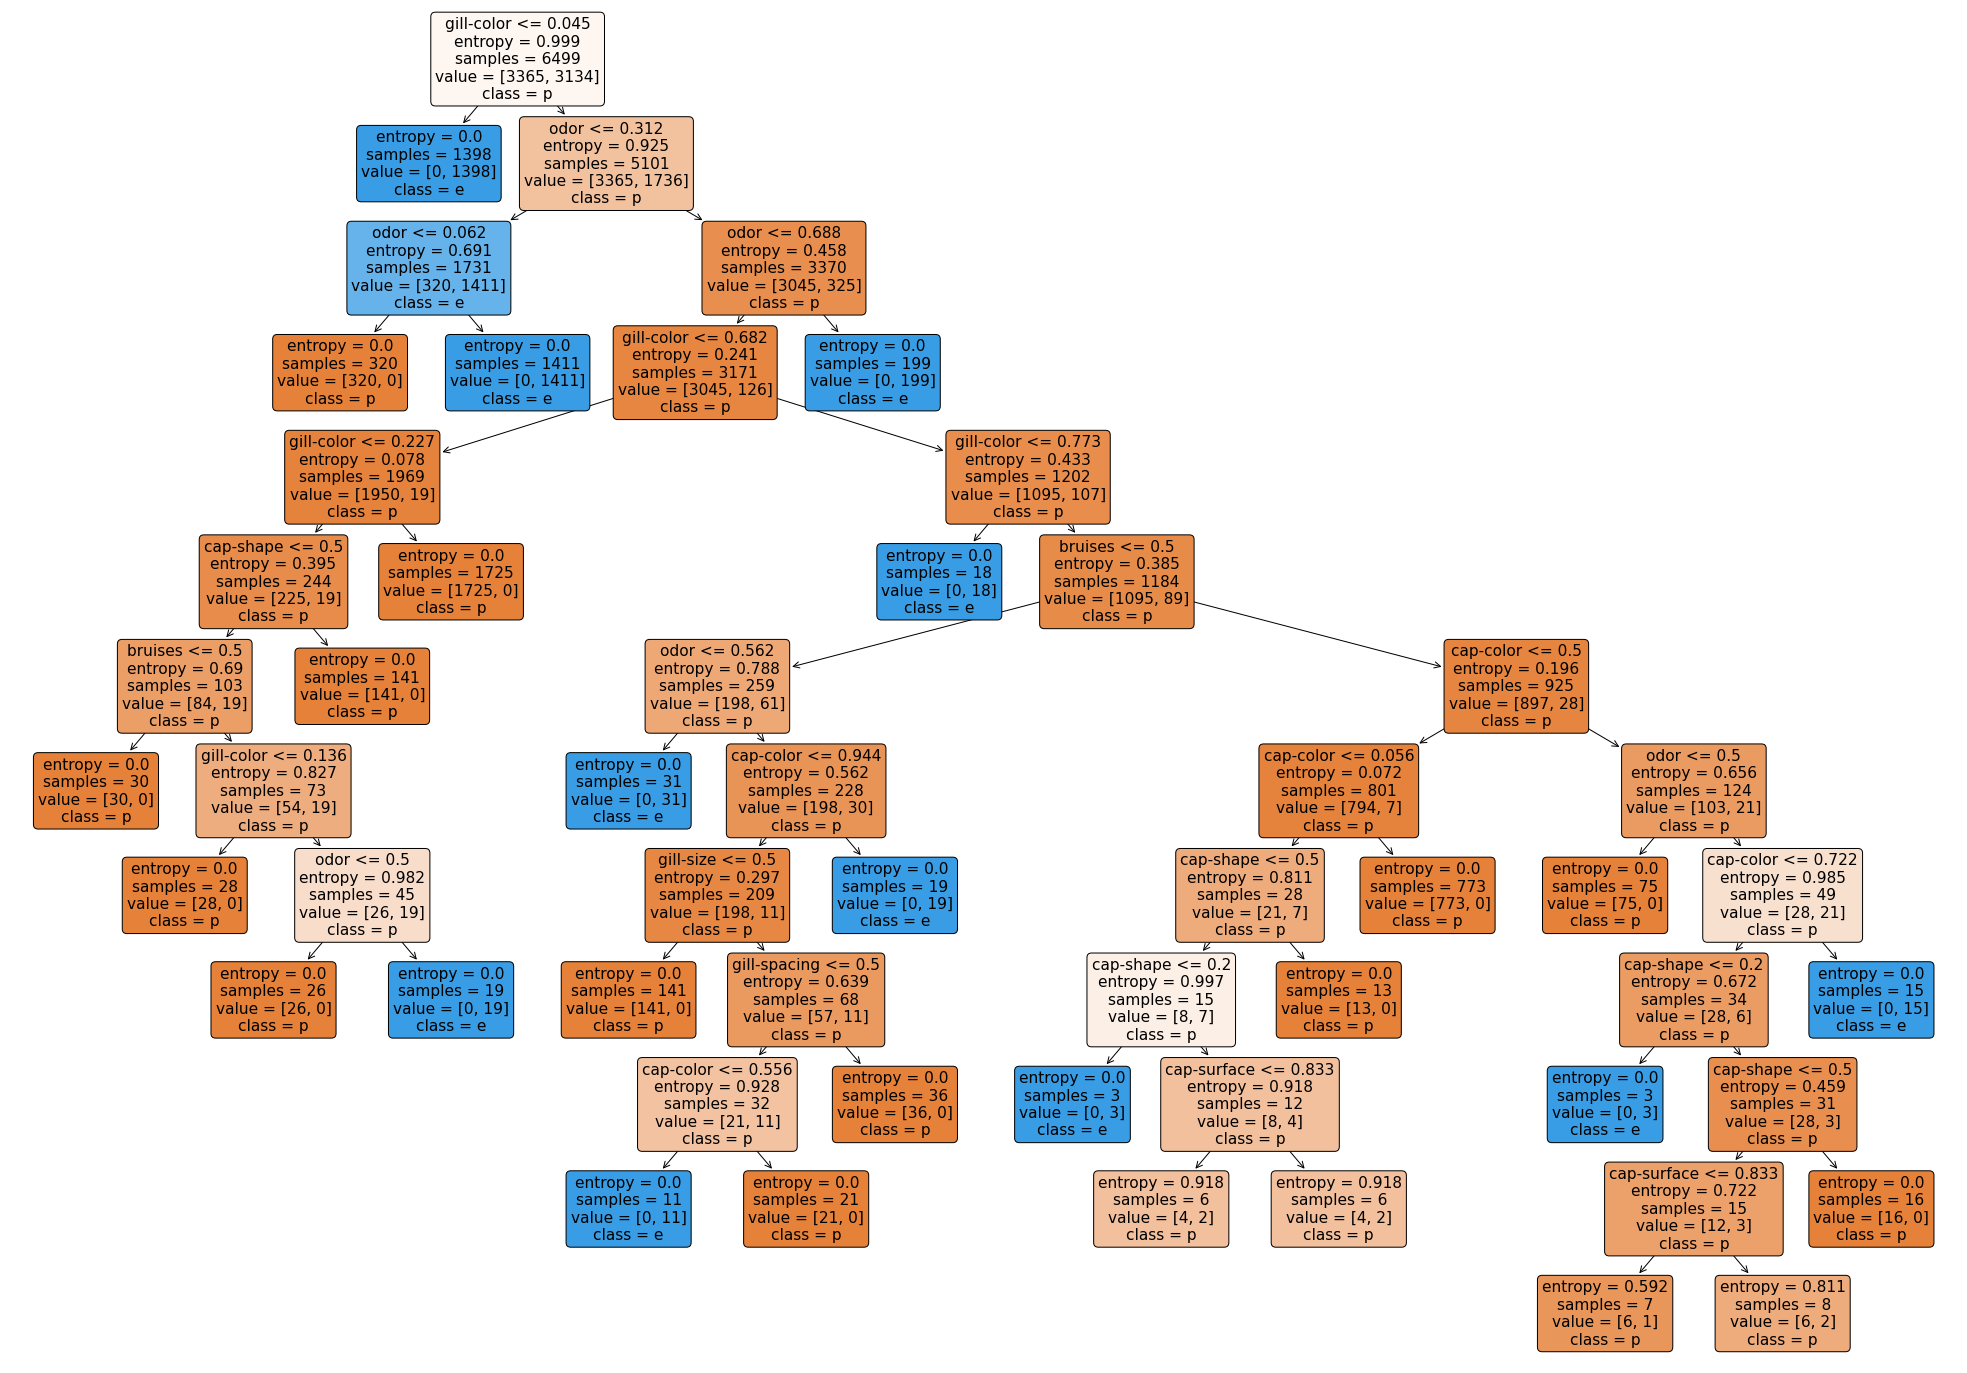

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test) 

fig = plt.figure(figsize=(35,25))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names=class_names,
                   filled=True,rounded=True)

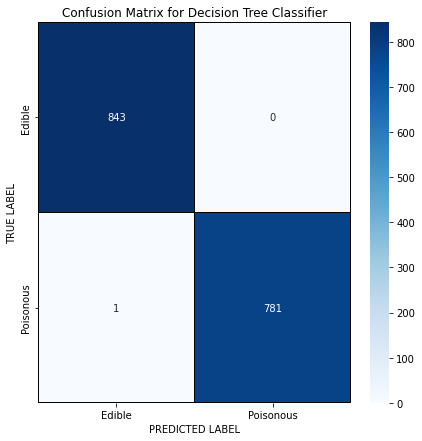

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black",
fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [ ]:
accuracy_tree=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_tree)
precision_agac=precision_score(Y_test, Y_pred)
print("Precision:", precision_agac)
recall_agac=recall_score(Y_test, Y_pred)
print("Recall:", recall_agac)
f1_score_agac=f1_score(Y_test, Y_pred)
print("F1_score:", f1_score_agac)

Accuracy: 0.9993846153846154
Precision: 1.0
Recall: 0.9987063389391979
F1_score: 0.9993527508090615


#KNN

In [ ]:
knc = KNeighborsClassifier(2)
knc=knc.fit(X_train,Y_train)
knc_pred = knc.predict(X_test)

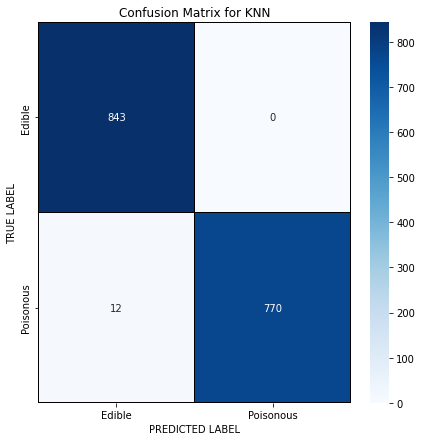

In [ ]:
cm = confusion_matrix(Y_test, knc_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black",
fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN')
plt.show()

In [ ]:
print(classification_report(Y_test,knc_pred))
print('\n')

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       843
         1.0       1.00      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625





In [ ]:
accuracy_knc=accuracy_score(Y_test, knc_pred)
print("Accuracy:", accuracy_knc)
precision_knc=precision_score(Y_test, knc_pred)
print("Precision:", precision_knc)
recall_knc=recall_score(Y_test, knc_pred)
print("Recall:", recall_knc)
f1_score_knc=f1_score(Y_test, knc_pred)
print("F1_score:", f1_score_knc)

Accuracy: 0.9926153846153846
Precision: 1.0
Recall: 0.9846547314578005
F1_score: 0.9922680412371134
